# IV. Transfer Model
---



This section uses the transfer model, EfficientNetB0, to see if it performs better than the CNN model we trained in the previous section.

In [1]:
# For this model, require version 2.9 of tensorflow to avoid a bug. Uncomment this cell if needed.
# !pip install tensorflow==2.9

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from numpy import savetxt
from IPython.display import Image

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
# For reproducibility
np.random.seed(42)
from numpy.random import seed
seed(42)

In [ ]:
# Mounting G-Drive FOLDER
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [ ]:
# Checking data folder
!ls /content/drive/MyDrive/Capstone/images

anything_but  bear_scat


In [ ]:
# Creating train_ds and val_ds for model
# This will go through the folder and find photos and classify them based on folder location
# ie. if in all folder will label all (1)
train_df = image_dataset_from_directory(
    '/content/drive/MyDrive/Capstone/images', # Directory
    image_size = (256, 256), # make sure all images are the same size
    batch_size = 32, # This will load 32 images at a time, memory can't hold them all
    seed = 42, # random seed for reproducibility
    validation_split = 0.2, 
    subset = 'training',
    label_mode = 'binary'
)

val_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/Capstone/images',
    image_size = (256, 256),
    batch_size = 32,
    seed = 42,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'binary'
)

Found 1047 files belonging to 2 classes.
Using 838 files for training.
Found 1047 files belonging to 2 classes.
Using 209 files for validation.


In [ ]:
# Inlcude top = false means it will not take the input layer, weights taken from the imagenet dataset, it has many classes
# and we just want a single output for this binary problem.
effnet = EfficientNetB0(include_top = False, weights = 'imagenet')

In [ ]:
# Prevent the model from being trained by our data as we want it to maintain the correct weights.
effnet.trainable = False
effnet.trainable

False

In [ ]:
# Transfer learning EfficientNetB0 model
tf_model = Sequential()
tf_model.add(effnet)
tf_model.add(GlobalAveragePooling2D())# Required.
# Flatten
tf_model.add(Flatten())

# Fully Connected
tf_model.add(Dense(64, activation='relu'))
tf_model.add(Dense(1, activation='sigmoid'))

#Compile
tf_model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Use early stopping.
es = EarlyStopping(patience = 5)

In [ ]:
# Fit the model.
transfer = tf_model.fit(train_df, validation_data= val_ds, epochs = 20, callbacks = [es])

Epoch 1/20
27/27 [==============================] - 1s 38ms/step - loss: 0.0491 - accuracy: 0.9881 - val_loss: 0.2218 - val_accuracy: 0.8947
Epoch 2/20
27/27 [==============================] - 1s 37ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.1866 - val_accuracy: 0.8995
Epoch 3/20
27/27 [==============================] - 1s 37ms/step - loss: 0.0380 - accuracy: 0.9904 - val_loss: 0.1924 - val_accuracy: 0.9091
Epoch 4/20
27/27 [==============================] - 1s 36ms/step - loss: 0.0369 - accuracy: 0.9916 - val_loss: 0.2008 - val_accuracy: 0.9043
Epoch 5/20
27/27 [==============================] - 1s 36ms/step - loss: 0.0404 - accuracy: 0.9869 - val_loss: 0.1953 - val_accuracy: 0.9139
Epoch 6/20
27/27 [==============================] - 1s 36ms/step - loss: 0.0313 - accuracy: 0.9892 - val_loss: 0.2045 - val_accuracy: 0.9139
Epoch 7/20
27/27 [==============================] - 1s 38ms/step - loss: 0.0398 - accuracy: 0.9845 - val_loss: 0.2118 - val_accuracy: 0.9139


In [ ]:
# Score model.
print(transfer.history['loss'][-1], transfer.history['val_loss'][-1])
print(transfer.history['accuracy'][-1], transfer.history['val_accuracy'][-1])

0.039826299995183945 0.21175937354564667
0.9844683408737183 0.9138755798339844


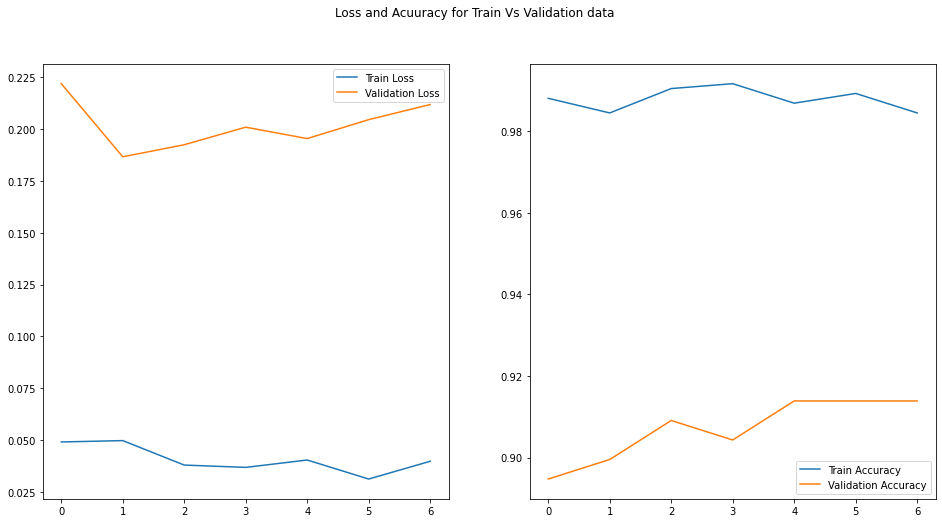

In [ ]:
# Plot loss and accuracy.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8),)
fig.suptitle('Loss and Acuuracy for Train Vs Validation data')
figsize=(16,16),
ax1.plot(transfer.history['loss'], label = 'Train Loss'),
ax1.plot(transfer.history['val_loss'], label = 'Validation Loss'),
ax1.legend()
ax2.plot(transfer.history['accuracy'], label = 'Train Accuracy'),
ax2.plot(transfer.history['val_accuracy'], label = 'Validation Accuracy')
ax2.legend();

---
### Conclusions

The transfer model performs well, but not signifcantly better than our CNN model. Going forward, it would be worth trying different transfer models, as well as gathering more labelled data to develop the best possible identification application.

---
